In [668]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [669]:
df = pd.read_csv('./data/healthcare_dataset.csv')

In [670]:
df.shape

(55500, 15)

In [671]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [673]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


## Suppression des espaces dans toutes les colonnes

In [674]:
df.columns = df.columns.str.strip()

## Remplacer les espaces des noms de colonnes par des underscores

In [675]:
df.columns = df.columns.str.replace(" ", "_")

## Remplacer le genre Male par 0 et Female par 1

In [676]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1).astype("int")

## Renommer certaines colonnes

In [677]:
df.rename(columns={'Medical_Condition': "Pathology"}, inplace=True)

## Conversion de la variable Date_Admission en type date

In [678]:
df['Date_of_Admission'] = pd.to_datetime(df['Date_of_Admission'])

## Creation de la colonne month

In [679]:
df['Month'] = df['Date_of_Admission'].dt.month_name()

In [680]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Pathology', 'Date_of_Admission',
       'Doctor', 'Hospital', 'Insurance_Provider', 'Billing_Amount',
       'Room_Number', 'Admission_Type', 'Discharge_Date', 'Medication',
       'Test_Results', 'Month'],
      dtype='object')

In [681]:
df.head()

,Name,Age,Gender,Blood_Type,Pathology,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Month
0,Bobby JacksOn,30,0,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,January
1,LesLie TErRy,62,0,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,August
2,DaNnY sMitH,76,1,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,September
3,andrEw waTtS,28,1,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,November
4,adrIENNE bEll,43,1,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,September


In [682]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood_Type            0
Pathology             0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
Month                 0
dtype: int64

In [683]:
df.drop_duplicates(inplace=True)

# Debut de l'analyse 

## Decouvertes des pathologies les plus frequentes

In [684]:
pathologies_count = df['Pathology'].value_counts()

In [685]:
pathologies_count

Pathology
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

## Pathologies les plus frequentes par sexe

In [686]:
pathologies_count_by_sex = df.groupby(df['Gender'])['Pathology'].value_counts()

In [687]:
pathologies_count_by_sex

Gender  Pathology   
0       Diabetes        4607
        Asthma          4584
        Hypertension    4582
        Arthritis       4576
        Cancer          4574
        Obesity         4573
1       Arthritis       4642
        Diabetes        4609
        Obesity         4573
        Hypertension    4569
        Cancer          4566
        Asthma          4511
Name: count, dtype: int64

## Pourcentage d'hommes et de femmes

In [688]:
# Compter le nombre d'homme et de femme
gender_counts = df['Gender'].value_counts()

#Calcul du pourcentage
gender_pourcentage = (gender_counts / gender_counts.sum()) * 100

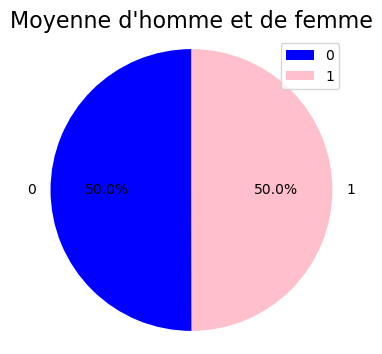

In [689]:
plt.figure(figsize=(4, 4))
gender_pourcentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], legend=True)

# Personnaliser le graphique
plt.title("Moyenne d'homme et de femme", fontsize=16)
plt.ylabel('')  # Supprimer l'étiquette par défaut
plt.axis('equal')  # Assurer que le pie chart est circulaire

# Afficher le graphique
plt.show()

## Moyenne d'age par sexe

In [690]:
mean_age_by_sex = df.groupby(df['Gender'])['Age'].mean()

## Visualisation de la moyenne d'age par sexe

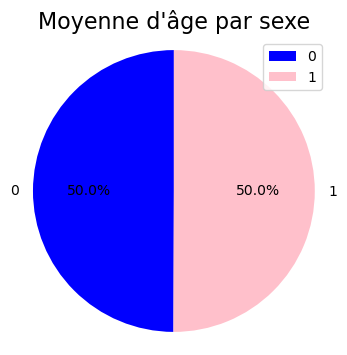

In [691]:
plt.figure(figsize=(4, 4))
mean_age_by_sex.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], legend=True)

# Personnaliser le graphique
plt.title("Moyenne d'âge par sexe", fontsize=16)
plt.ylabel('')  # Supprimer l'étiquette par défaut
plt.axis('equal')  # Assurer que le pie chart est circulaire

# Afficher le graphique
plt.show()

## Les maladies les plus recurrentes chez les hommes et les femmes selon des tranches d'ages

In [692]:
# Création des tranches d'âge
bins = [0, 18, 30, 45, 60, 75, 100]  # Définir les limites des tranches d'âge
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']  # Étiquettes pour les tranches d'âge
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [693]:
# Grouper par sexe et tranche d'âge, puis compter les occurrences des pathologies
diseases_by_gender_age = df.groupby(['Gender','Age_Group'])['Pathology'].value_counts().unstack(fill_value=0)

C:\Users\Sevan Kedesh IKISSA\AppData\Local\Temp\ipykernel_25856\881000353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diseases_by_gender_age = df.groupby(['Gender','Age_Group'])['Pathology'].value_counts().unstack(fill_value=0)


In [694]:
# Réinitialiser l'index pour un formatage correct du DataFrame
diseases_by_gender_age = diseases_by_gender_age.reset_index()

In [695]:
# Créer un DataFrame sous un format long pour Seaborn
diseases_by_gender_age_long = diseases_by_gender_age.melt(id_vars=['Gender', 'Age_Group'], 
                                                          var_name='Pathology', 
                                                          value_name='Count')

## Visualisation des maladies les plus recurrentes chez les hommes et les femmes selon les tranches d'ages

C:\Users\Sevan Kedesh IKISSA\AppData\Local\Temp\ipykernel_25856\2934925026.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age_Group', y='Count', hue='Pathology', data=diseases_by_gender_age_long, ci=None)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-30'),
  Text(2, 0, '31-45'),
  Text(3, 0, '46-60'),
  Text(4, 0, '61-75'),
  Text(5, 0, '76-100')])

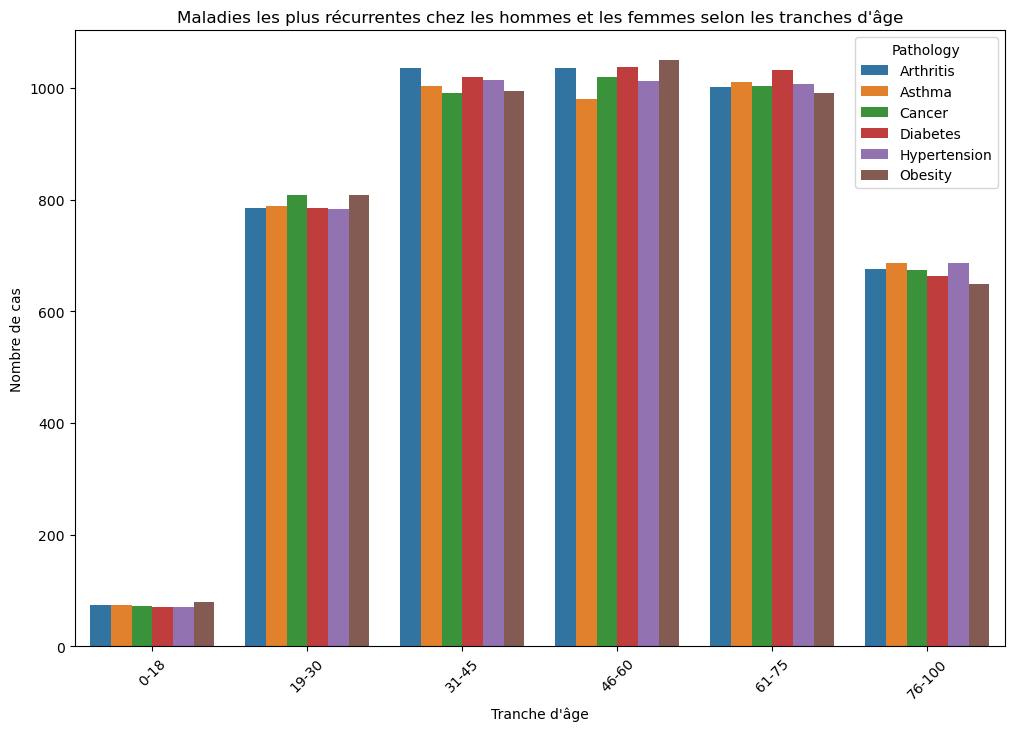

In [696]:
# Visualiser avec un graphique à barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Group', y='Count', hue='Pathology', data=diseases_by_gender_age_long, ci=None)

# Ajouter les détails du graphique
plt.title("Maladies les plus récurrentes chez les hommes et les femmes selon les tranches d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45)

## Couts moyens par pathologies

In [697]:
mean_cost_by_pathology = df.groupby(df['Pathology'])['Billing_Amount'].mean()

## Visualisations des couts moyens par pathologies

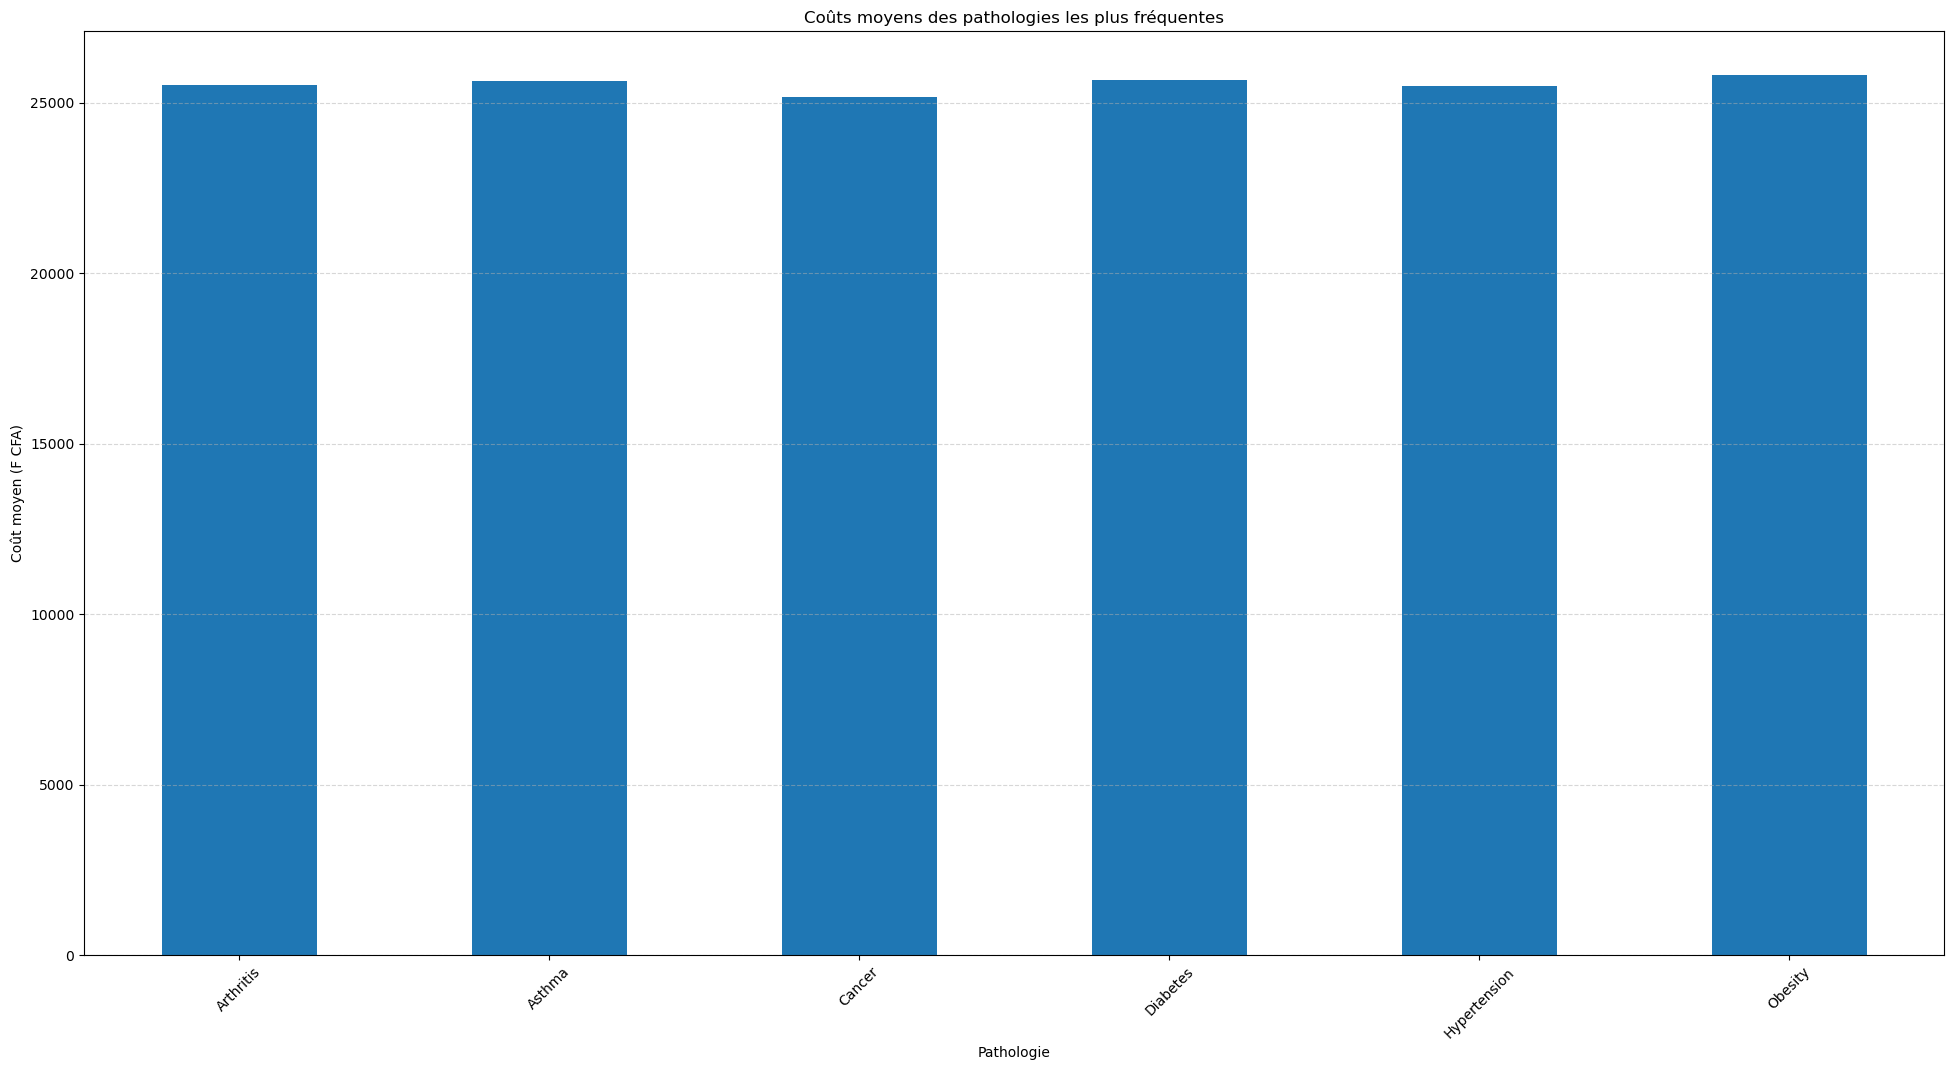

In [698]:
mean_cost_by_pathology.plot(kind='bar', figsize=(24, 12))
plt.title('Coûts moyens des pathologies les plus fréquentes')
plt.xlabel('Pathologie')
plt.ylabel('Coût moyen (F CFA)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Couts moyens par pathologies par sexes

In [699]:
average_cost_by_sex = df.groupby(['Gender', 'Pathology'])['Billing_Amount'].mean().unstack()

## Visualisation

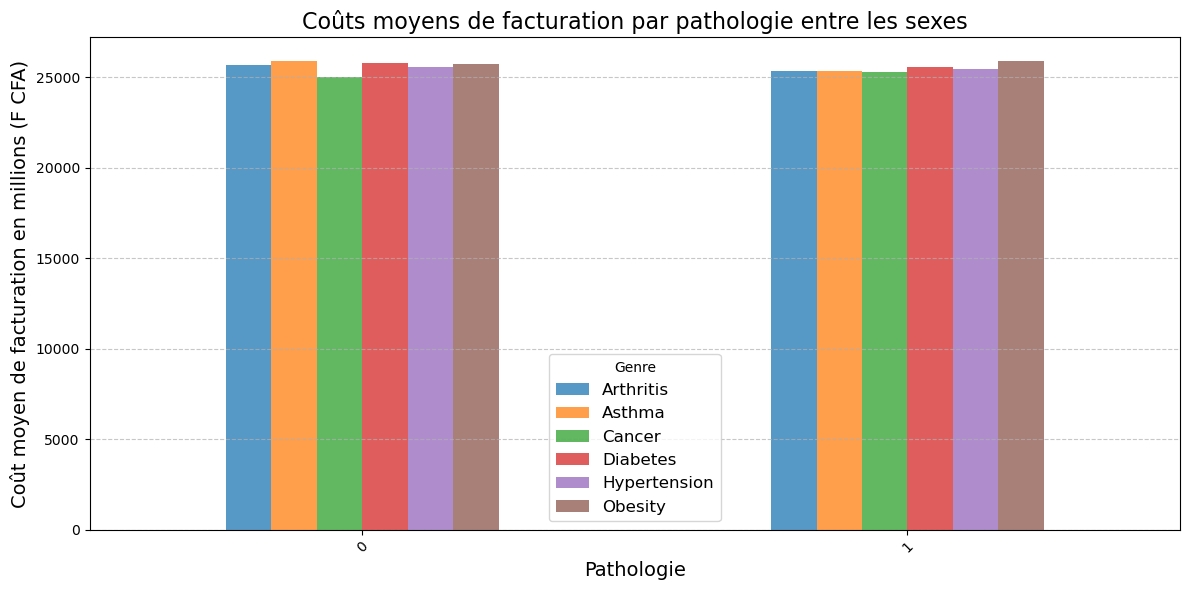

In [700]:
plt.figure(figsize=(12, 6))
average_cost_by_sex.plot(kind='bar', ax=plt.gca(), alpha=0.75)

# Personnaliser le graphique
plt.title('Coûts moyens de facturation par pathologie entre les sexes', fontsize=16)
plt.xlabel('Pathologie', fontsize=14)
plt.ylabel('Coût moyen de facturation en millions (F CFA)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Genre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajuste les éléments pour un affichage optimal
plt.show()

In [701]:
df.head()

,Name,Age,Gender,Blood_Type,Pathology,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results,Month,Age_Group
0,Bobby JacksOn,30,0,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,January,19-30
1,LesLie TErRy,62,0,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,August,61-75
2,DaNnY sMitH,76,1,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,September,76-100
3,andrEw waTtS,28,1,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,November,19-30
4,adrIENNE bEll,43,1,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,September,31-45


## Evolution des couts dans le temps

In [702]:
evolution_cost_by_time = df.groupby('Month')['Billing_Amount'].sum()

## Visualisation des couts dans le temps

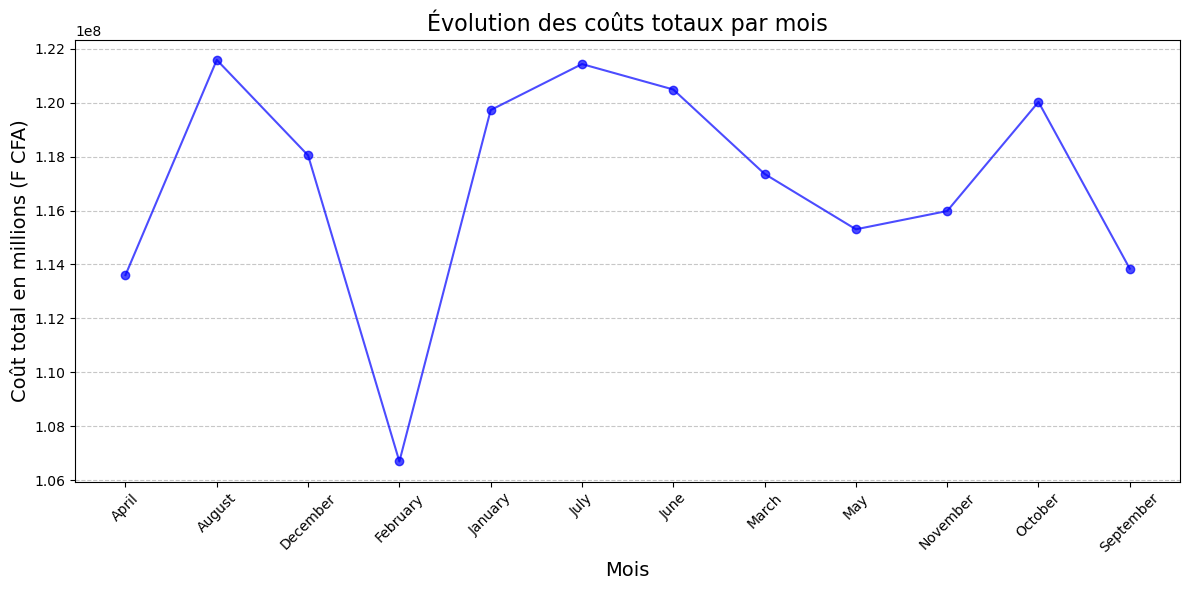

In [703]:
plt.figure(figsize=(12, 6))
plt.plot(evolution_cost_by_time.index.astype(str), evolution_cost_by_time.values, marker='o', linestyle='-', color='b', alpha=0.7)

# Personnaliser le graphique
plt.title('Évolution des coûts totaux par mois', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Coût total en millions (F CFA)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Pathologie par sexe

In [704]:
# Tableau croise entre le sexe et la pathologie
pathology_by_sex = pd.crosstab(df['Pathology'], df['Gender'])

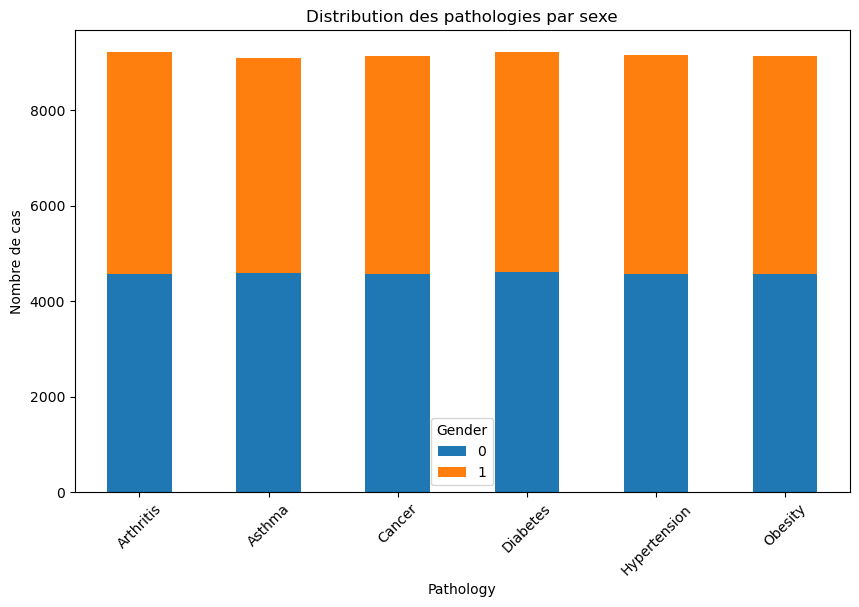

In [705]:
# Visualisation avec un graphique en barres
pathology_by_sex.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des pathologies par sexe")
plt.xlabel("Pathology")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45)
plt.show()

## Age moyen par pathologie

In [706]:
age_mean_by_pathology = df.groupby("Pathology")['Age'].mean()

## Age moyenne par pathologie

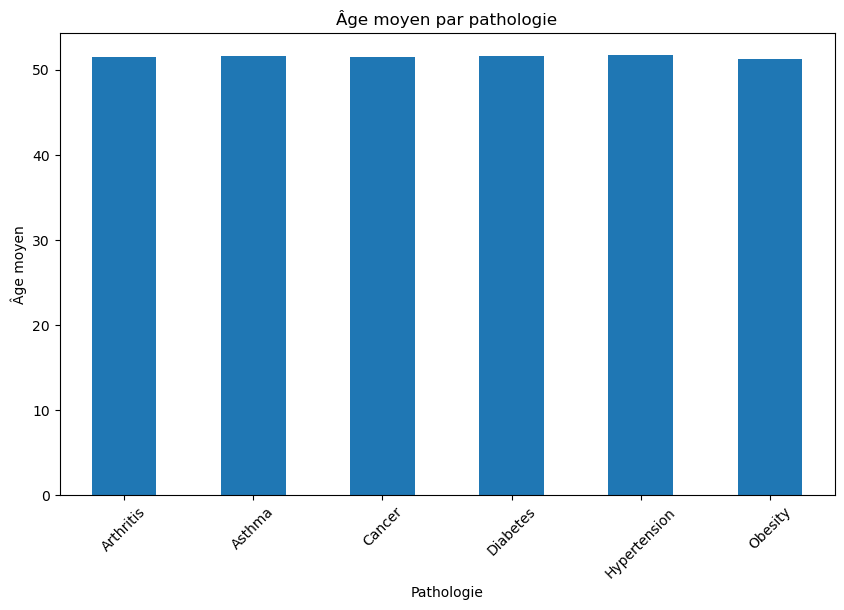

In [707]:
# Visualisation avec un graphique à barres
age_mean_by_pathology.plot(kind='bar', figsize=(10, 6))
plt.title("Âge moyen par pathologie")
plt.xlabel("Pathologie")
plt.ylabel("Âge moyen")
plt.xticks(rotation=45)
plt.show()

## Distribution des ages par pathologie et sexe

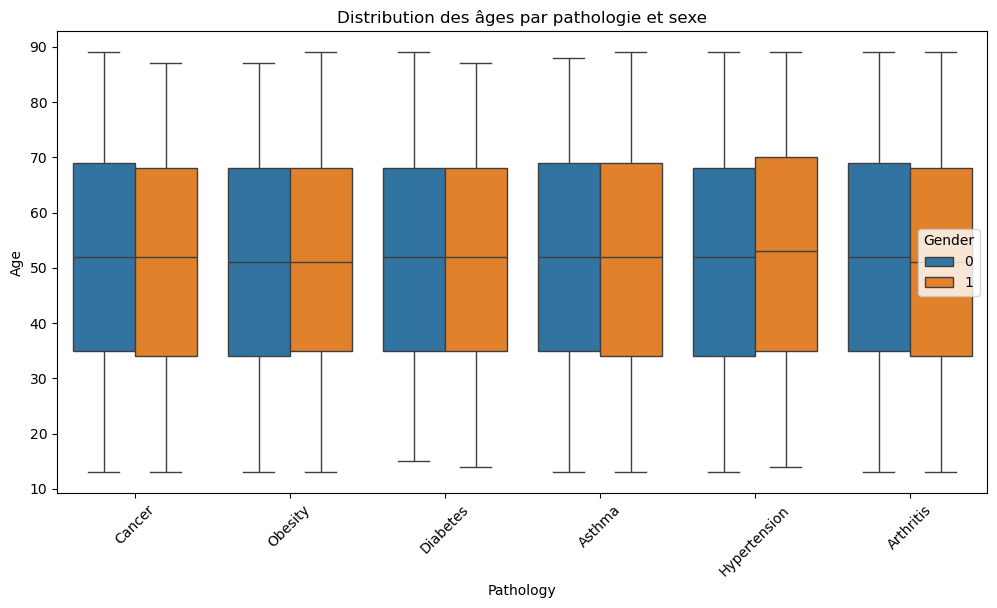

In [708]:
# Visualiser les âges par pathologie et sexe avec boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pathology', y='Age', hue='Gender', data=df)
plt.title('Distribution des âges par pathologie et sexe')
plt.xticks(rotation=45)
plt.show()

In [709]:
# Créer une table de contingence pour les pathologies par sexe
contingency_table = pd.crosstab(df['Pathology'], df['Gender'])

# Appliquer le test du chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("Il y a une corrélation significative entre la pathologie et le sexe.")
else:
    print("Aucune corrélation significative entre la pathologie et le sexe.")

Chi2 Statistic: 1.0720859034675596, p-value: 0.956544546171692
Aucune corrélation significative entre la pathologie et le sexe.
